# Exercise 5

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


1. Create the LSTM model

In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words, activation='relu'))
model.add(Dense(total_words, activation ='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           337500    
                                                                 
 bidirectional (Bidirection  (None, 10, 200)           160800    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 200)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               240800    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 3375)              678375    
                                                                 
 dense_1 (Dense)             (None, 3375)              1

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 28s 29ms/step - loss: 6.8211 - accuracy: 0.0240
Epoch 2/100
484/484 [==============================] - 7s 15ms/step - loss: 6.4040 - accuracy: 0.0340
Epoch 3/100
484/484 [==============================] - 6s 13ms/step - loss: 6.1639 - accuracy: 0.0417
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 5.8605 - accuracy: 0.0544
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 5.5146 - accuracy: 0.0690
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 5.1517 - accuracy: 0.0882
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 4.7712 - accuracy: 0.1070
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 4.3347 - accuracy: 0.1373
Epoch 9/100
484/484 [==============================] - 7s 14ms/step - loss: 3.8397 - accuracy: 0.1863
Epoch 10/100
484/484 [==============================] - 7s 14ms/step - loss: 3.33

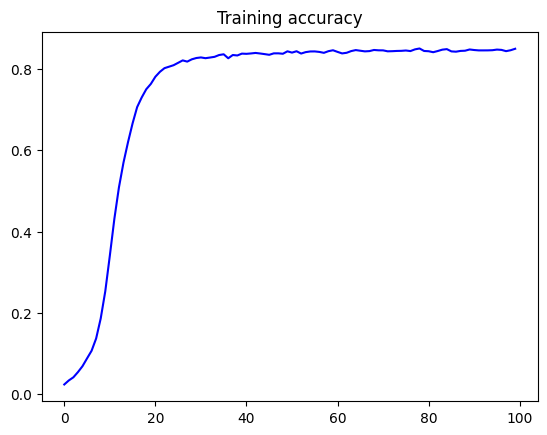

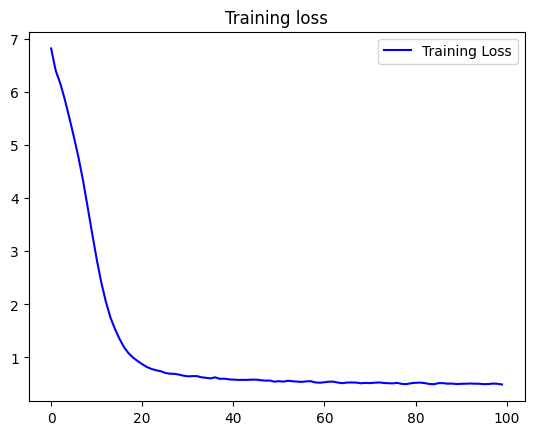

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [6]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax (model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 18ms/step
Help me Obi Wan Kenobi, you're my only hope lose posterity my pain one one spent to be gone grossly me ' my heart in you to lie with me of me i thee thee i not my mind in thee frown in my mind in mind thy mind not decrease decrease weeks light dead twain have i perish night of settled disabled amazeth seen me ' have ranged gone to me the tomb the beard of hour survey dwells asleep asleep of his reign inflaming eye sound all his heart sang stol'n not your feature light torn rolling me well wide of wrong than garments' end than greater
